In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./file/3_23/rr.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,103103,103103,0.802,41516.549,0.000,52229.113,1.0,0.795,0.206,8446.215,10712.565,0.000,8446.215
1,0,DC_OS,103097,103097,0.600,44310.004,0.547,40374.949,1.0,1.000,0.000,1614.998,0.000,0.000,1615.545
2,0,DC_MB,103097,103097,0.754,55480.688,5.281,17457.602,1.0,1.000,0.000,7624.391,0.000,0.000,7629.672
3,0,DC_SH,103094,103094,0.702,46750.125,2.579,28187.996,1.0,1.000,0.000,27152.276,0.000,0.000,27154.855
4,0,DC_LA,103094,103094,0.657,41870.317,4.461,9757.413,1.0,1.000,0.000,8781.672,0.000,0.000,8786.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,102104,128640,1.000,45900.000,0.000,52269.838,1.0,0.879,0.122,3867.296,6369.839,0.000,3867.296
5041,604800,DC_OS,102100,102100,0.595,44258.483,0.196,42851.453,1.0,1.000,0.000,1714.059,0.000,0.000,1714.254
5042,604800,DC_MB,102096,102096,0.747,55293.000,0.000,30299.449,1.0,1.000,0.000,4095.529,-24993.551,0.695,4096.223
5043,604800,DC_SH,102094,102094,0.696,46562.625,3.282,22938.712,1.0,1.000,0.000,17923.940,0.000,0.000,17927.222


In [3]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

<AxesSubplot:>

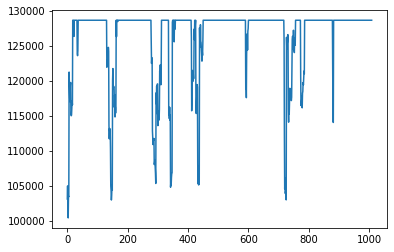

In [4]:
df_CR['finishedRequestNum'].plot()

In [5]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'OS':df_OS['dcConsume'], 'MB':df_MB['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

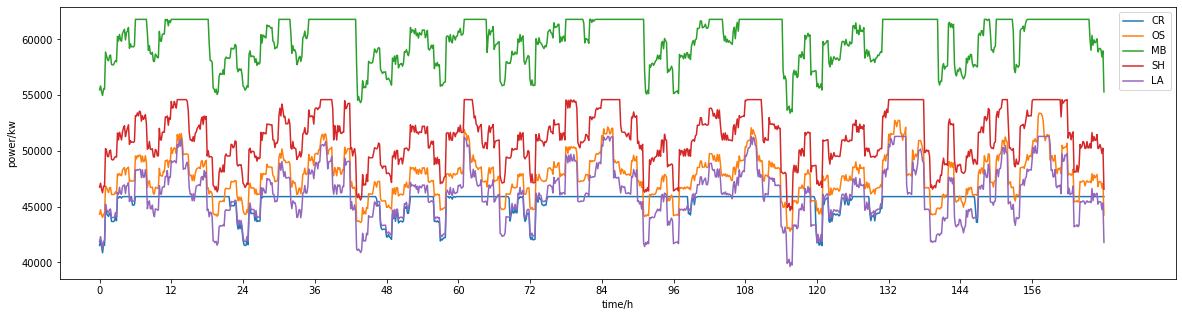

In [6]:
df_DcConsume.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [7]:
df_ReSupply = pd.DataFrame({'CR':df_CR['reSupply'], 'OS':df_OS['reSupply'], 'MB':df_MB['reSupply'], 'SH':df_SH['reSupply'], 'LA':df_LA['reSupply']})

In [8]:
df_ReSupply

,CR,OS,MB,SH,LA
0,52229.113,40374.949,17457.602,28187.996,9757.413
1,52348.347,41032.746,17673.831,28347.501,9176.815
2,51952.419,41098.297,18195.346,28721.869,9456.330
3,51893.660,38978.857,18326.570,27669.707,9189.496
4,50483.330,41948.247,17885.354,28427.240,9955.743
...,...,...,...,...,...
1004,35730.572,43385.488,47583.341,17357.203,23617.471
1005,35991.181,40154.953,46760.447,18241.433,23430.910
1006,35374.602,40166.801,44812.520,18561.213,25582.693
1007,35107.429,42184.346,46538.097,17702.181,24459.506


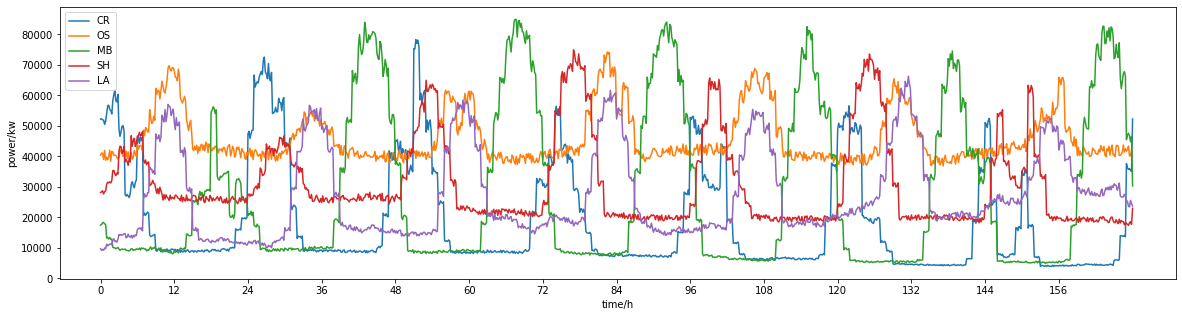

In [9]:
df_ReSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.show()

In [10]:
ss = []
for i in range(17):
    s = 0
    for j in df_ReSupply['OS']:
        if j>i*2000 and j<(i+1)*2000:
            s += 1
    ss.append(s)
ss

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

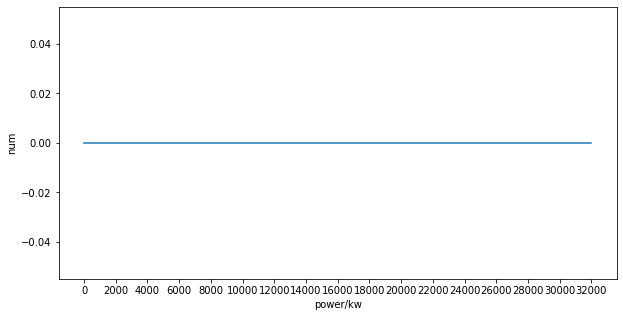

In [11]:
fig = plt.figure(figsize= (10, 5))
plt.xlabel("power/kw")
plt.ylabel("num")
plt.xticks(np.arange(0, 17, 1), np.arange(0, 34000, 2000))
plt.plot(ss)
plt.show()

In [12]:
df_RequestNum = pd.DataFrame({'CR':df_CR['requestNum'], 'OS':df_OS['requestNum'], 'MB':df_MB['requestNum'], 'SH':df_SH['requestNum'], 'LA':df_LA['requestNum']})

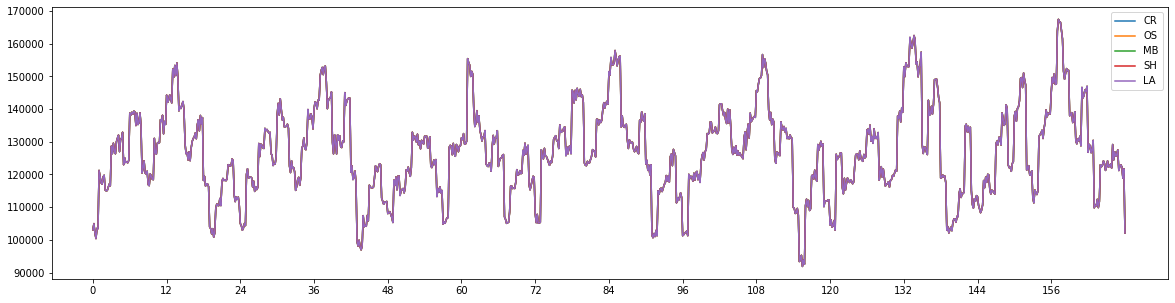

In [13]:
df_RequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [14]:
df_FinishedRequestNum = pd.DataFrame({'CR':df_CR['finishedRequestNum'], 'OS':df_OS['finishedRequestNum'], 'MB':df_MB['finishedRequestNum'], 'SH':df_SH['finishedRequestNum'], 'LA':df_LA['finishedRequestNum']})

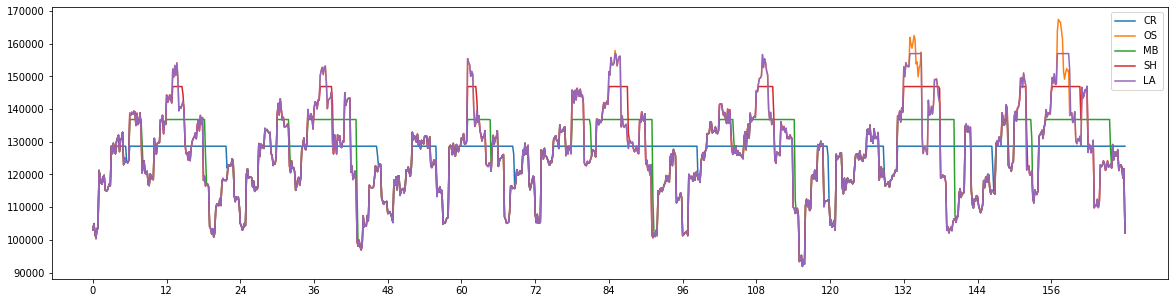

In [15]:
df_FinishedRequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [16]:
df_BaSupply = pd.DataFrame({'CR':df_CR['baSupply'], 'OS':df_OS['baSupply'], 'MB':df_MB['baSupply'], 'SH':df_SH['baSupply'], 'LA':df_LA['baSupply']})

In [17]:
#for i in [216]
df_BaSupply['LA'][216:288].sum()

-122124.329

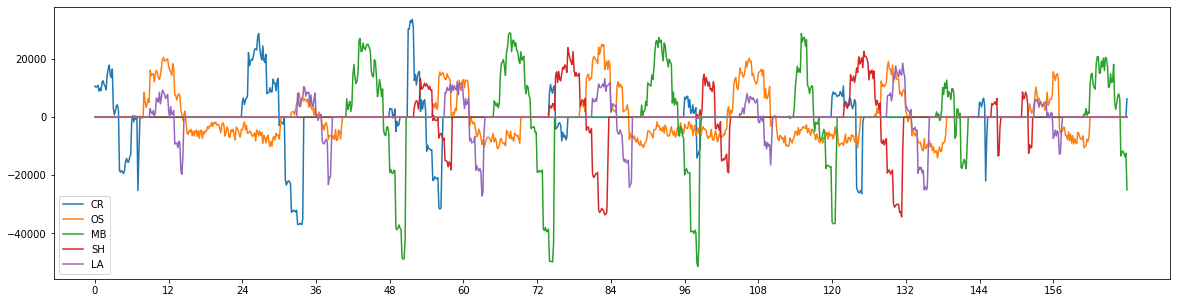

In [18]:
df_BaSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [19]:
df_DcPrice = pd.DataFrame({'CR':df_CR['dcPrice'], 'OS':df_OS['dcPrice'], 'MB':df_MB['dcPrice'], 'SH':df_SH['dcPrice'], 'LA':df_LA['dcPrice']})

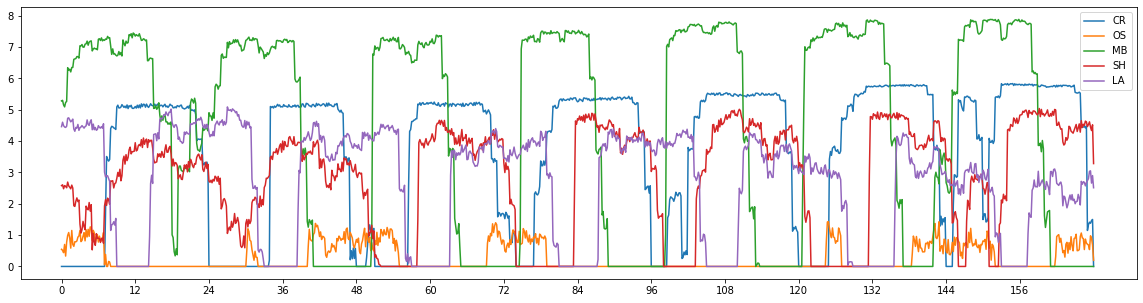

In [20]:
df_DcPrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [21]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})

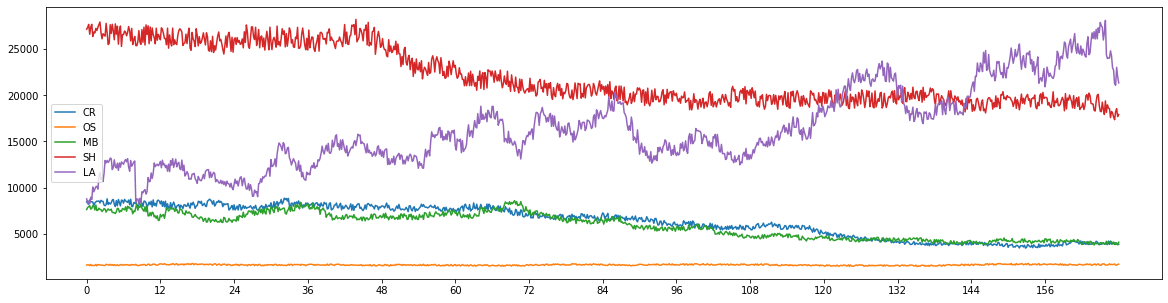

In [22]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [23]:
df_Cost = pd.DataFrame({'CR':df_CR['cost'], 'OS':df_OS['cost'], 'MB':df_MB['cost'], 'SH':df_SH['cost'], 'LA':df_LA['cost']})

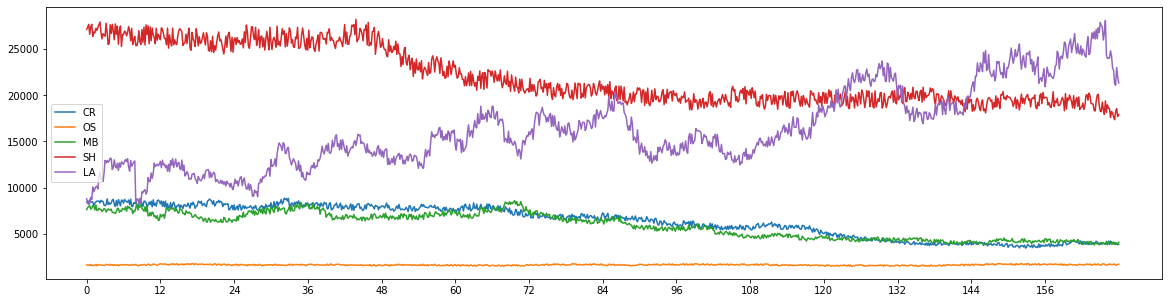

In [24]:
df_Cost.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [25]:
df_ReUsage = pd.DataFrame({'CR':df_CR['reUsage'], 'OS':df_OS['reUsage'], 'MB':df_MB['reUsage'], 'SH':df_SH['reUsage'], 'LA':df_LA['reUsage']})

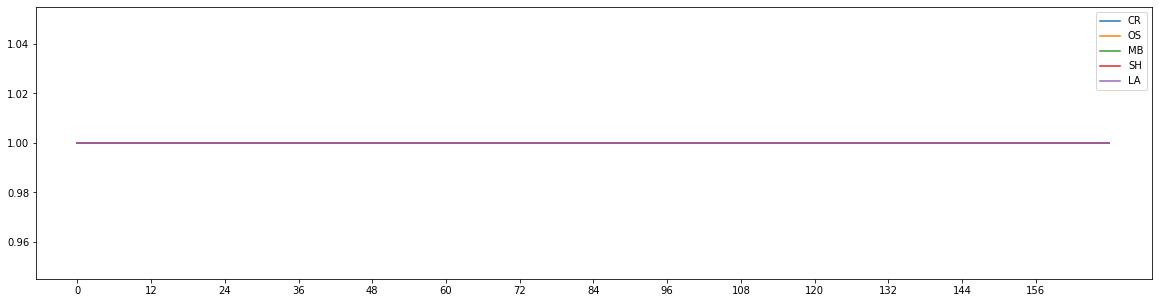

In [26]:
df_ReUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

<AxesSubplot:>

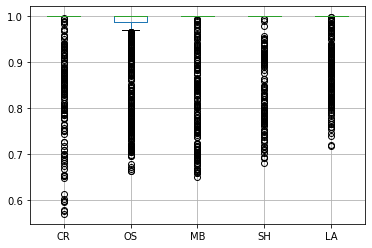

In [27]:
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})
df_ReDcUsage.boxplot()

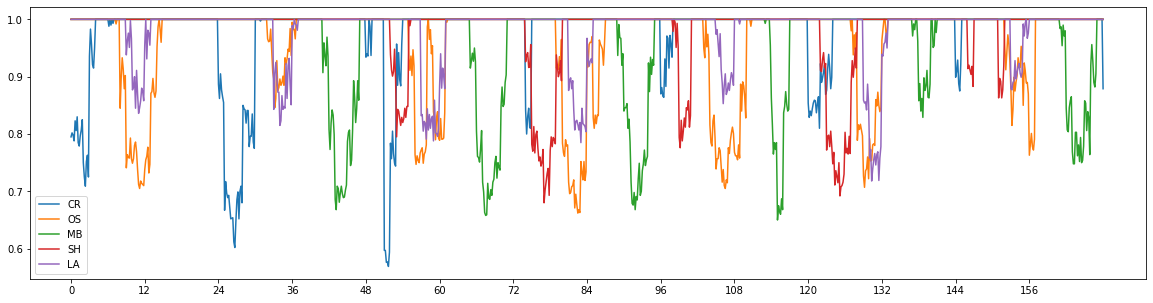

In [28]:
df_ReDcUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()